In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
data = pd.read_csv ('2022.csv')

In [3]:
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,1192021,1,19,2021,1100.0,2021000001,2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1212021,1,21,2021,1100.0,2021000002,2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1212021,1,21,2021,1100.0,2021000003,2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1172021,1,17,2021,1100.0,2021000004,2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1152021,1,15,2021,1100.0,2021000005,2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,0.0,0.0


In [4]:
data.shape

(438693, 303)

## Data Preprocessing

In [5]:
# we create a backup to the data
df = data.copy()

In [6]:
x = df.isna().sum()

In [7]:
x

_STATE      0
FMONTH      0
IDATE       0
IMONTH      0
IDAY        0
           ..
_VEGLT1A    0
_FRT16A     0
_VEG23A     0
_FRUITE1    0
_VEGETE1    0
Length: 303, dtype: int64

In [8]:
count = 0
for i in x:
    z = (i/438693)*100
    if z > 90:
        count+=1
print(count)

91


In [9]:
# As we see that 91 columns are having empty values greater than 50% so its better to drop them
df = df.loc[:, df.isna().sum() < 0.90*df.shape[0]]

In [10]:
df.shape

(438693, 212)

In [11]:
# CVDINFR4(stroke condition) - This field is related to stroke condition and has the following values:-
# 1 - Yes
# 2 - No
# 7 - Don't Know
# 9 - Refused
# For our analysis purpose we only need rows where CVDINFR4 is 1 or 2

df = df.loc[(df['CVDINFR4'].isin([1, 2]))]
df


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,1192021,1,19,2021,1100.0,2021000001,2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1212021,1,21,2021,1100.0,2021000002,2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1212021,1,21,2021,1100.0,2021000003,2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1172021,1,17,2021,1100.0,2021000004,2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1152021,1,15,2021,1100.0,2021000005,2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,78.0,12.0,1062022,1,6,2022,1100.0,2021001381,2.021001e+09,NaN,...,1.0,1.0,157.0,393.0,1.0,1.0,1.0,1.0,0.0,0.0
438689,78.0,12.0,1122022,1,12,2022,1100.0,2021001382,2.021001e+09,NaN,...,1.0,1.0,200.0,157.0,1.0,1.0,1.0,1.0,0.0,0.0
438690,78.0,12.0,12212021,12,21,2021,1100.0,2021001383,2.021001e+09,NaN,...,1.0,1.0,200.0,143.0,1.0,1.0,1.0,1.0,0.0,0.0
438691,78.0,12.0,1112022,1,11,2022,1100.0,2021001384,2.021001e+09,NaN,...,1.0,1.0,100.0,156.0,1.0,1.0,1.0,1.0,0.0,0.0


In [12]:
df.shape

(436038, 212)

In [13]:
# store the count of label for Stroke
stroke_count = np.where(df['CVDINFR4']==1, 1, 0) 
# other_cancer_count = np.where(df['CHCOCNCR']==1, 1, 0)
# skin_other_count = np.where((df['CHCSCNCR']==1) | (df['CHCOCNCR']==1), 1, 0)


In [14]:
# drop the stroke label coulmn 
df = df.drop(['CVDINFR4'], axis=1)
# df = df.drop(['CHCOCNCR'], axis=1)

In [15]:
df.shape

(436038, 211)

### There are some columns which are not related to health as per our observation from the code book hence its better to remove them

In [16]:
# removing columns FMONTH, DISPCODE, SEQNO, PVTRESD1, HHADULT
df = df.drop(columns = ['FMONTH','DISPCODE','SEQNO','PVTRESD1','HHADULT', 'STATERE1', 'CELPHON1'], axis=1)
# removing date columns IMONTH, IDAY, IDATE, and IYEAR as they are the columns of interview date
df = df.drop(columns = ['IMONTH', 'IDAY', 'IDATE', 'IYEAR'], axis=1)

## Heatmaps are a good way to find out the coorelation between columns. This way we can remove the highly corelated columns 

In [17]:
# Replacing the NaN or Null values with the mode of each columns
df2 = df.fillna(df.median())
# creating a corelation matrix
corr_mat = df2.corr().abs()

In [18]:
corr_mat

,_STATE,_PSU,CTELENM1,LADULT1,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
_STATE,1.000000,0.046356,0.001081,0.052231,0.001975,0.008132,0.010991,0.009759,0.009761,NaN,...,0.004596,0.005657,0.001463,0.004390,0.004835,0.004014,0.002041,0.002304,0.005077,0.006175
_PSU,0.046356,1.000000,0.001638,0.033678,0.101113,0.106605,0.041952,0.065317,0.151527,NaN,...,0.029097,0.029415,0.040820,0.052046,0.030322,0.029580,0.045008,0.055824,0.045218,0.051874
CTELENM1,0.001081,0.001638,1.000000,0.000088,0.002137,0.005327,0.000164,0.000244,0.000559,NaN,...,0.000775,0.000850,0.000198,0.000120,0.000661,0.000990,0.000152,0.000184,0.000778,0.000855
LADULT1,0.052231,0.033678,0.000088,1.000000,0.016885,0.002594,0.006808,0.020055,0.000930,NaN,...,0.000760,0.000037,0.001689,0.003176,0.000497,0.000122,0.002924,0.003535,0.000490,0.001559
NUMADULT,0.001975,0.101113,0.002137,0.016885,1.000000,0.402693,0.437701,0.452825,0.181451,NaN,...,0.000276,0.011856,0.006959,0.004389,0.004016,0.014738,0.003062,0.000783,0.001503,0.010414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_VEGLT1A,0.004014,0.029580,0.000990,0.000122,0.014738,0.014468,0.000457,0.001853,0.007194,NaN,...,0.729247,0.991025,0.028724,0.049802,0.721786,1.000000,0.014474,0.039628,0.667720,0.882125
_FRT16A,0.002041,0.045008,0.000152,0.002924,0.003062,0.001945,0.000800,0.000928,0.000410,NaN,...,0.025656,0.012332,0.830079,0.370026,0.036189,0.014474,1.000000,0.399835,0.383806,0.169018
_VEG23A,0.002304,0.055824,0.000184,0.003535,0.000783,0.001952,0.000040,0.004100,0.000631,NaN,...,0.021499,0.034042,0.376849,0.827848,0.025851,0.039628,0.399835,1.000000,0.143075,0.419814
_FRUITE1,0.005077,0.045218,0.000778,0.000490,0.001503,0.001707,0.002934,0.000948,0.003608,NaN,...,0.913263,0.673195,0.302732,0.127723,0.893121,0.667720,0.383806,0.143075,1.000000,0.675841


In [19]:
high_corrcol = []
for i in range(1,corr_mat.shape[0]-1):
    for j in range(0,i):
        if corr_mat.iloc[i][j] > 0.85:
            high_corrcol.append(corr_mat.columns[j])
high_corrcol

['ACETOUCH',
 'ACETTHEM',
 '_STATE',
 '_STRWT',
 '_CRACE1',
 '_STRWT',
 '_WT2RAKE',
 'EXERANY2',
 'LMTJOIN3',
 '_PRACE1',
 '_RACE',
 '_RACEG21',
 '_IMPRACE',
 '_RACE',
 'SEXVAR',
 '_HCVU652',
 '_AGEG5YR',
 '_AGEG5YR',
 '_AGE80',
 'HTIN4',
 'WTKG3',
 'EDUCA',
 '_RFSMOK3',
 'DRNKANY5',
 'DRNKANY5',
 'DROCDY3_',
 'DRNKANY5',
 'DROCDY3_',
 '_RFBING5',
 'DRNKANY5',
 'DROCDY3_',
 '_RFBING5',
 '_DRNKWK1',
 'HIVTST7',
 '_MISFRT1',
 '_MISFRT1',
 '_MISVEG1',
 'FRUTDA2_',
 'VEGEDA2_',
 '_MISFRT1',
 '_FRTRES1',
 '_MISVEG1',
 '_VEGRES1',
 '_MISFRT1',
 '_FRTRES1',
 '_FRTLT1A']

In [20]:
df2 = df2.drop(high_corrcol,axis = 1)

In [21]:
df2.shape

(436038, 168)

In [23]:
df.to_csv('preprocessed_dataset_2021.csv', index=False)


In [22]:
# Now we are inserting the labels columns back to the dataframe
df2.insert(len(df2.columns), 'CVDINFR4', stroke_count)

In [23]:
df2.shape

(436038, 169)

In [24]:
final_data = df2.copy()

In [25]:
final_data

,_PSU,CTELENM1,LADULT1,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,...,FRNCHDA_,POTADA1_,_FRUTSU1,_VEGESU1,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,CVDINFR4
0,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,43.0,14.0,100.0,214.0,1.0,1.0,1.0,0.0,0.0,0
1,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,0.0,14.0,100.0,128.0,1.0,1.0,1.0,0.0,0.0,0
2,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,14.0,14.0,100.0,71.0,2.0,1.0,1.0,0.0,0.0,0
3,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,57.0,27.0,114.0,165.0,1.0,1.0,1.0,0.0,0.0,0
4,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,29.0,29.0,100.0,258.0,1.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,2.021001e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,14.0,50.0,157.0,393.0,1.0,1.0,1.0,0.0,0.0,0
438689,2.021001e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,14.0,14.0,200.0,157.0,1.0,1.0,1.0,0.0,0.0,0
438690,2.021001e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,0.0,14.0,200.0,143.0,1.0,1.0,1.0,0.0,0.0,0
438691,2.021001e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,0.0,13.0,100.0,156.0,1.0,1.0,1.0,0.0,0.0,0


# Visualizations

### Relationship between Cholestrol and Stroke


#### The data provided has the stroke condition criteria which will help us to know how cholestrol condition is related to stroke, field name for stroke condition - CVDINFR4


In [26]:
final_data['TOLDHI3'].replace(2, 0, inplace=True)
final_data['TOLDHI3'].replace(7, np.nan, inplace=True)
final_data['TOLDHI3'].replace(9, np.nan, inplace=True)


In [27]:
plt.figure(figsize=(15,20))
firstVisual = final_data.groupby(['TOLDHI3','CVDINFR4']).size()

<Figure size 1500x2000 with 0 Axes>

In [28]:
visualDataOne = firstVisual.unstack()
visualDataOneTranspose = visualDataOne.transpose()
visualDataOneTransposePercent = visualDataOneTranspose.div(visualDataOneTranspose.sum())
visualDataOnePercent = visualDataOneTransposePercent.transpose()


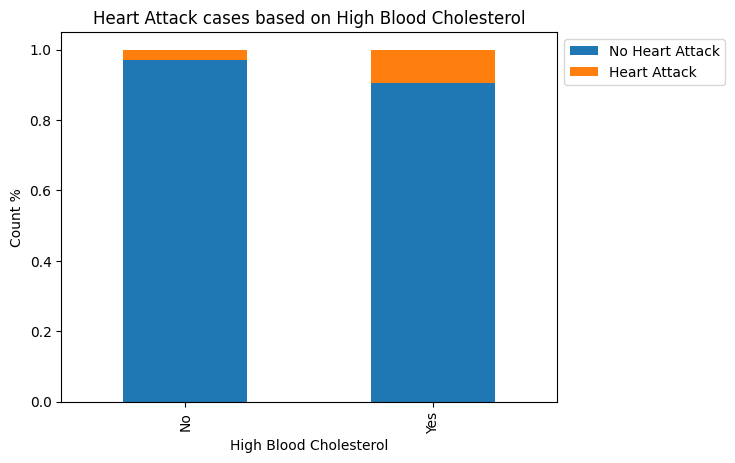

In [29]:
visualDataOnePercent.plot(kind='bar',stacked=True).legend(["No Heart Attack", "Heart Attack"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions, labels)
plt.xlabel('High Blood Cholesterol')
plt.ylabel('Count %')
plt.title("Heart Attack cases based on High Blood Cholesterol")

plt.show()

### According to the graph people with high cholestrol are more prone to stroke condition that the people without.

### Relationship between BP and Stroke
##### The data provided has the stroke condition criteria which will help us to know how BP is related to stroke, field name for stroke condition - CVDINFR4

In [30]:
final_data['BPHIGH6'].replace(2, 1, inplace=True) 
final_data['BPHIGH6'].replace(3, 0, inplace=True)
final_data['BPHIGH6'].replace(4, 1, inplace=True)
final_data['BPHIGH6'].replace(7, np.nan, inplace=True)
final_data['BPHIGH6'].replace(9, np.nan, inplace=True)

In [31]:
plt.figure(figsize=(15,20))
secondVisual = final_data.groupby(['TOLDHI3','BPHIGH6']).size()

<Figure size 1500x2000 with 0 Axes>

In [32]:
visualDataTwo = firstVisual.unstack()
visualDataTwoTranspose = visualDataTwo.transpose()
visualDataTwoTransposePercent = visualDataTwoTranspose.div(visualDataOneTranspose.sum())
visualDataTwoPercent = visualDataTwoTransposePercent.transpose()


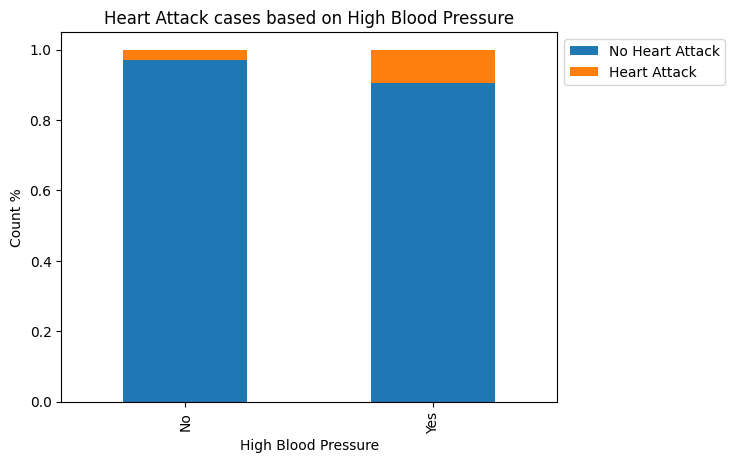

In [33]:
visualDataTwoPercent.plot(kind='bar',stacked=True).legend(["No Heart Attack", "Heart Attack"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions, labels)
plt.xlabel('High Blood Pressure')
plt.ylabel('Count %')
plt.title("Heart Attack cases based on High Blood Pressure")

plt.show()

###### According to the graph people with high BP are more prone to stroke condition that the people without.

In [34]:
df2.head()


,_PSU,CTELENM1,LADULT1,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,...,FRNCHDA_,POTADA1_,_FRUTSU1,_VEGESU1,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,CVDINFR4
0,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,43.0,14.0,100.0,214.0,1.0,1.0,1.0,0.0,0.0,0
1,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,0.0,14.0,100.0,128.0,1.0,1.0,1.0,0.0,0.0,0
2,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,14.0,14.0,100.0,71.0,2.0,1.0,1.0,0.0,0.0,0
3,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,57.0,27.0,114.0,165.0,1.0,1.0,1.0,0.0,0.0,0
4,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,29.0,29.0,100.0,258.0,1.0,1.0,1.0,0.0,0.0,1


In [35]:
# Get labels
df2_stroke = df2['CVDINFR4']

# drop labels from dataset
df2.drop(['CVDINFR4'], axis=1, inplace=True)

In [36]:
df2_stroke

0         0
1         0
2         0
3         0
4         1
         ..
438688    0
438689    0
438690    0
438691    0
438692    0
Name: CVDINFR4, Length: 436038, dtype: int64

In [39]:
has_stroke = 0
no_stroke = 0
for i in df2_stroke:
    if i == 0:
        has_stroke+=1
    else:
        no_stroke+=1

# Actual count of cancer labels below
print(has_stroke," ",no_stroke)

413207   22831


## XGBoost

In [40]:
scaler_transform = StandardScaler()
normalized_data = scaler_transform.fit_transform(df2)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, df2_stroke, shuffle=True, test_size=0.2, random_state=42)


In [42]:
from xgboost import XGBClassifier
XGB = XGBClassifier(use_label_encoder=False)
XGB.fit(X_train, y_train)

/Users/chiranjeevi/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
y_true, y_pred = y_test, XGB.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82617
           1       0.81      0.77      0.79      4591

    accuracy                           0.98     87208
   macro avg       0.90      0.88      0.89     87208
weighted avg       0.98      0.98      0.98     87208



In [44]:
print("Accuracy on test data: {:.2f}".format(XGB.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(XGB.score(X_train, y_train)))
# matrix = plot_confusion_matrix(XGB, normalized_data, df2_stroke, display_labels=['No Heart Attack',"Heart Attack"], cmap=plt.cm.Reds)
# matrix.ax_.set_title('Confusion Matrix')
with open('Final_Project_XGB.dat', 'w') as fw:
    for m in y_pred:
        print(m, file=fw)

Accuracy on test data: 0.98
Accuracy on training data: 0.99


## Decision Tree

In [45]:
parameters = {'n_estimators':[150, 200, 250, 300], 'max_depth':[5, 6, 7, 8], 'learning_rate':[0.01, 0.02, 0.03]}

In [46]:
df_dt = data.copy()
df_dt = df.fillna(0)

In [47]:
scaler_normalization = StandardScaler()
normalized_data = scaler_normalization.fit_transform(df_dt)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, df2_stroke, shuffle=True, test_size=0.2, random_state=42)


In [49]:
parameters = {'splitter':['best', 'random'], 'max_depth':[5, 10, 15, 20, 25], 'criterion':['gini', 'entropy']}


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
DT = tree.DecisionTreeClassifier(class_weight="balanced")
clf = GridSearchCV(DT, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [51]:
clf.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [52]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     82617
           1       0.65      1.00      0.79      4591

    accuracy                           0.97     87208
   macro avg       0.82      0.98      0.89     87208
weighted avg       0.98      0.97      0.97     87208



In [54]:

with open('Final_Project_XGB.dat', 'w') as fw:
    for m in y_pred:
        print(m, file=fw)

## Random Forest

In [55]:
scaler_transform = StandardScaler()
normalized_data = scaler_transform.fit_transform(df2)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, df2_stroke, shuffle=True, test_size=0.2, random_state=42)


In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = RandomForestClassifier()
params = {'max_depth':[10, 15], 'n_estimators':[100, 150]}

gsc = GridSearchCV(model, params, cv=5,verbose=2)
gsc.fit(X_train,y_train.ravel())
gsc_best = gsc.best_estimator_
y_pred=gsc_best.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=  22.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=  22.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=  21.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=  22.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=  22.6s
[CV] END .....................max_depth=10, n_estimators=150; total time=  34.2s
[CV] END .....................max_depth=10, n_estimators=150; total time=  34.1s
[CV] END .....................max_depth=10, n_estimators=150; total time= 5.1min
[CV] END .....................max_depth=10, n_estimators=150; total time=  32.5s
[CV] END .....................max_depth=10, n_estimators=150; total time=  33.3s
[CV] END .....................max_depth=15, n_estimators=100; total time=  26.8s
[CV] END .....................max_depth=15, n_est

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82617
           1       0.84      0.74      0.78      4591

    accuracy                           0.98     87208
   macro avg       0.91      0.86      0.89     87208
weighted avg       0.98      0.98      0.98     87208



In [60]:
# print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
# print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
with open('Final_Project_rf.dat', 'w') as fw:
    for m in y_pred:
        print(m, file=fw)